# Data Analysis
<div style="text-align: justify">
In this phase, we analyze the CSV extracted of each model using 'knn_exploration.py' and models_exploration.py, with a focus on KNN.
</div>

In [44]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import openml
import warnings
warnings.filterwarnings("ignore")



In [45]:
knn_metrics = pd.read_csv('../csv_files/metrics_knn.csv')

In [46]:
knn_metrics.head(10)

,dataset,model,neighbours,weights,tasks_description,accuracy,precision,recall,f1,roc_auc,roc_auc_ovr
0,3,knn,3,uniform,balanced_binary_tasks,0.780364,0.785977,0.774733,0.771814,0.840251,0.840251
1,15,knn,3,uniform,balanced_binary_tasks,0.958530,0.946495,0.933667,0.938697,0.980975,0.980975
2,29,knn,3,uniform,balanced_binary_tasks,0.824638,0.835878,0.846154,0.832629,0.866814,0.866814
3,31,knn,3,uniform,balanced_binary_tasks,0.753000,0.626432,0.436667,0.512593,0.727738,0.727738
4,37,knn,3,uniform,balanced_binary_tasks,0.740841,0.648836,0.578348,0.608424,0.763501,0.763501
5,43,knn,3,uniform,balanced_binary_tasks,0.890245,0.872907,0.847235,0.858866,0.932022,0.932022
6,49,knn,3,uniform,balanced_binary_tasks,0.835044,0.833776,0.942832,0.881254,0.823366,0.823366
7,219,knn,3,uniform,balanced_binary_tasks,0.694271,0.747872,0.740594,0.731855,0.730087,0.730087
8,9910,knn,3,uniform,balanced_binary_tasks,0.756073,0.764725,0.794487,0.779158,0.808709,0.808709
9,9946,knn,3,uniform,balanced_binary_tasks,0.964787,0.980627,0.924242,0.950533,0.984706,0.984706


In [47]:
roc_auc_means = knn_metrics.groupby('neighbours')['roc_auc'].mean()
roc_auc_means

neighbours
3     0.795998
5     0.813143
7     0.820401
9     0.827274
11    0.830120
13    0.832784
15    0.834350
Name: roc_auc, dtype: float64

In [48]:
knn_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dataset            700 non-null    int64  
 1   model              700 non-null    object 
 2   neighbours         700 non-null    int64  
 3   weights            700 non-null    object 
 4   tasks_description  700 non-null    object 
 5   accuracy           700 non-null    float64
 6   precision          378 non-null    float64
 7   recall             378 non-null    float64
 8   f1                 378 non-null    float64
 9   roc_auc            378 non-null    float64
 10  roc_auc_ovr        700 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 60.3+ KB


## Balanced Datasets - Overview:
It is expected that balanced datasets are well measured by accuracy and roc_auc. How we do not know the caracteristics of each dataset, we do not know where to use precision or recall in this moment

In [49]:
neighbor_values = [3, 5, 7, 9, 11, 13, 15]

for n in neighbor_values:
    knn_metrics_binary_balanced_n = knn_metrics.query("tasks_description == 'balanced_binary_tasks' & neighbours == @n")
    mean_acc = knn_metrics_binary_balanced_n.describe()['accuracy']['mean']
    mean_roc = knn_metrics_binary_balanced_n.describe()['roc_auc']['mean']
    
    # Print the mean accuracy and roc_auc for each DataFrame
    print(f"\nMean accuracy for {n} neighbours:", mean_acc)
    print(f"Mean roc_auc for {n} neighbours:", mean_roc)



Mean accuracy for 3 neighbours: 0.8231075914755112
Mean roc_auc for 3 neighbours: 0.8489454073788585

Mean accuracy for 5 neighbours: 0.824356399483765
Mean roc_auc for 5 neighbours: 0.8615213488728232

Mean accuracy for 7 neighbours: 0.8225615465041829
Mean roc_auc for 7 neighbours: 0.8641619913177125

Mean accuracy for 9 neighbours: 0.8203880016883434
Mean roc_auc for 9 neighbours: 0.8648047444511346

Mean accuracy for 11 neighbours: 0.8173763237860368
Mean roc_auc for 11 neighbours: 0.8628088978042642

Mean accuracy for 13 neighbours: 0.8174496308740703
Mean roc_auc for 13 neighbours: 0.8598330110055807

Mean accuracy for 15 neighbours: 0.8173097447423183
Mean roc_auc for 15 neighbours: 0.8578396282166584


## Disbalanced Datasets - Overview:
It is expected that disbalanced datasets are not well measured by accuracy. Instead, we can use something like roc_auc. 

In [50]:
neighbor_values = [3, 5, 7, 9, 11, 13, 15]
mean_acc = []
mean_roc = []

for n in neighbor_values:
    knn_metrics_binary_disbalanced_n = knn_metrics.query("tasks_description == 'disbalanced_binary_tasks' & neighbours == @n")
    mean_acc.append(knn_metrics_binary_disbalanced_n.describe()['accuracy']['mean'])
    mean_roc.append(knn_metrics_binary_disbalanced_n.describe()['roc_auc']['mean'])

# Print the mean accuracy for each number of neighbors
for i, n in enumerate(neighbor_values):
    print(f"\nMean accuracy for {n} neighbours:", mean_acc[i])
    print(f"Mean roc_auc for {n} neighbours:", mean_roc[i])


Mean accuracy for 3 neighbours: 0.833042159127924
Mean roc_auc for 3 neighbours: 0.7389774778661538

Mean accuracy for 5 neighbours: 0.8413117583409941
Mean roc_auc for 5 neighbours: 0.7610431786024404

Mean accuracy for 7 neighbours: 0.8440416952982075
Mean roc_auc for 7 neighbours: 0.7732728961431362

Mean accuracy for 9 neighbours: 0.8495855693674681
Mean roc_auc for 9 neighbours: 0.7868553635246585

Mean accuracy for 11 neighbours: 0.8512404751569485
Mean roc_auc for 11 neighbours: 0.7949172484873028

Mean accuracy for 13 neighbours: 0.8518487626548527
Mean roc_auc for 13 neighbours: 0.8036534988619924

Mean accuracy for 15 neighbours: 0.8534672256124929
Mean roc_auc for 15 neighbours: 0.8090543124571432


## Multiclass Datasets - Overview:
It is expected that mutliclass datasets are not so well measured by accuracy. Instead, we can use something like roc_auc_ovr. Different of roc_auc, the roc_auc_ovr is a good measure to multiclass dataset because it measures each value of target against the all other targets.

In [51]:
neighbor_values = [3, 5, 7, 9, 11, 13, 15]
mean_acc = []
mean_roc_ovr = []

for n in neighbor_values:
    knn_metrics_multiclass_n = knn_metrics.query("tasks_description == 'multiclass_tasks' & neighbours == @n")
    mean_acc.append(knn_metrics_multiclass_n.describe()['accuracy']['mean'])
    mean_roc.append(knn_metrics_multiclass_n.describe()['roc_auc_ovr']['mean'])

for i, n in enumerate(neighbor_values):
    print(f"\nMean accuracy for {n} neighbours:", mean_acc[i])
    print(f"Mean roc_auc_ovr for {n} neighbours:", mean_roc[i])


Mean accuracy for 3 neighbours: 0.7757291698757866
Mean roc_auc_ovr for 3 neighbours: 0.7389774778661538

Mean accuracy for 5 neighbours: 0.7789353628311246
Mean roc_auc_ovr for 5 neighbours: 0.7610431786024404

Mean accuracy for 7 neighbours: 0.7822449561148908
Mean roc_auc_ovr for 7 neighbours: 0.7732728961431362

Mean accuracy for 9 neighbours: 0.7821605087319731
Mean roc_auc_ovr for 9 neighbours: 0.7868553635246585

Mean accuracy for 11 neighbours: 0.7816678359744038
Mean roc_auc_ovr for 11 neighbours: 0.7949172484873028

Mean accuracy for 13 neighbours: 0.7830713010520093
Mean roc_auc_ovr for 13 neighbours: 0.8036534988619924

Mean accuracy for 15 neighbours: 0.782354983341916
Mean roc_auc_ovr for 15 neighbours: 0.8090543124571432


## Analysis of disbalanced datasets

In [81]:
knn_metrics_binary_disbalanced = knn_metrics.query("tasks_description == 'disbalanced_binary_tasks'")
knn_metrics_binary_disbalanced

,dataset,model,neighbours,weights,tasks_description,accuracy,precision,recall,f1,roc_auc,roc_auc_ovr
14,3021,knn,3,uniform,disbalanced_binary_tasks,0.963948,0.845740,0.510688,0.622980,0.871321,0.871321
15,3902,knn,3,uniform,disbalanced_binary_tasks,0.890274,0.572526,0.426797,0.485109,0.825140,0.825140
16,3903,knn,3,uniform,disbalanced_binary_tasks,0.879095,0.370293,0.218750,0.272421,0.716943,0.716943
17,3904,knn,3,uniform,disbalanced_binary_tasks,0.740564,0.310775,0.277310,0.292345,0.592231,0.592231
18,3913,knn,3,uniform,disbalanced_binary_tasks,0.802467,0.570051,0.476364,0.488166,0.737016,0.737016
...,...,...,...,...,...,...,...,...,...,...,...
672,9952,knn,15,distance,disbalanced_binary_tasks,0.896558,0.851405,0.785594,0.816670,0.952350,0.952350
673,9971,knn,15,distance,disbalanced_binary_tasks,0.672414,0.378747,0.253676,0.295498,0.680694,0.680694
674,9977,knn,15,distance,disbalanced_binary_tasks,0.930217,0.951355,0.951709,0.951236,0.974368,0.974368
675,9978,knn,15,distance,disbalanced_binary_tasks,0.937255,0.587500,0.093750,0.152208,0.836603,0.836603


Getting the 20 worst roc_auc metrics between the disbalanced binary datasets. 12 of the them belongs to the dataset 10101. Its a good start to see what is happening in these datasets.

In [52]:
knn_metrics_binary_disbalanced = knn_metrics.query("tasks_description == 'disbalanced_binary_tasks'")
lowest_accuracies = knn_metrics_binary_disbalanced.nsmallest(20, 'roc_auc')
lowest_accuracies.sort_values(by='roc_auc')

,dataset,model,neighbours,weights,tasks_description,accuracy,precision,recall,f1,roc_auc,roc_auc_ovr
276,10101,knn,7,distance,disbalanced_binary_tasks,0.672613,0.180614,0.222222,0.177655,0.497942,0.497942
376,10101,knn,9,distance,disbalanced_binary_tasks,0.688649,0.204384,0.238889,0.195030,0.500384,0.500384
76,10101,knn,3,distance,disbalanced_binary_tasks,0.659171,0.216933,0.278758,0.226384,0.506109,0.506109
176,10101,knn,5,distance,disbalanced_binary_tasks,0.668613,0.233112,0.244771,0.198943,0.506249,0.506249
476,10101,knn,11,distance,disbalanced_binary_tasks,0.693982,0.232788,0.238889,0.200656,0.514084,0.514084
26,10101,knn,3,uniform,disbalanced_binary_tasks,0.681910,0.245211,0.306863,0.251403,0.537390,0.537390
576,10101,knn,13,distance,disbalanced_binary_tasks,0.697982,0.251486,0.244444,0.205371,0.538336,0.538336
676,10101,knn,15,distance,disbalanced_binary_tasks,0.701982,0.270518,0.255556,0.217868,0.547661,0.547661
126,10101,knn,5,uniform,disbalanced_binary_tasks,0.699369,0.345179,0.295098,0.244505,0.563995,0.563995
226,10101,knn,7,uniform,disbalanced_binary_tasks,0.707387,0.285648,0.261438,0.221905,0.569734,0.569734


In [53]:
def is_numerical(column):
    try:
        if column.dtype in (np.float64, np.int64, np.uint8):
            return True
        return False
    except ValueError:
        return False

In [54]:
from pandas.api.types import is_categorical_dtype

def is_categorical(column):
    try:
        if column.dtype in (object, bool) or is_categorical_dtype(column):
            return True
        return False
    except ValueError:
        return False

In [56]:
task = openml.tasks.get_task(9971)
dataset_id = task.dataset_id

With this get_dataset() function, we can extract the datasets from the tasks of cc18 collections. Now, we'll analyze the datasets with worst metrics to see if they have something in commom

In [57]:
def get_dataset(dataSetId: int, n_of_rows: int = None):
    try:
        dataset = openml.datasets.get_dataset(
            dataSetId, 
            download_data=True, 
            download_qualities=True, 
            download_features_meta_data=True
        )
        raw_data, *_ = dataset.get_data()  # Obtém os dados
        data = pd.DataFrame(raw_data)  # Converte para um DataFrame
        if(n_of_rows is not None):
            data = self.data[:n_of_rows]
        return data
    except Exception as e:
        self.data = None
        self.error = str(e)  

dataset_9971 = get_dataset(dataset_id)
dataset_9971.head(20)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154.0,16.0,12.0,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1


In [58]:
dataset_9971.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V1      583 non-null    uint8   
 1   V2      583 non-null    category
 2   V3      583 non-null    float64 
 3   V4      583 non-null    float64 
 4   V5      583 non-null    float64 
 5   V6      583 non-null    float64 
 6   V7      583 non-null    float64 
 7   V8      583 non-null    float64 
 8   V9      583 non-null    float64 
 9   V10     583 non-null    float64 
 10  Class   583 non-null    category
dtypes: category(2), float64(8), uint8(1)
memory usage: 38.5 KB


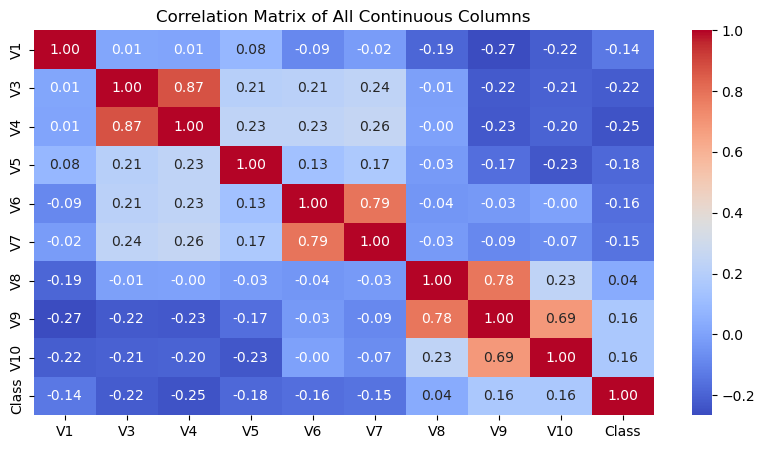

In [59]:
numeric_cols = [column for column in dataset_9971 if is_numerical(dataset_9971[column])] + ['Class']
correlation_matrix = dataset_9971[numeric_cols].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Continuous Columns')
plt.show()

The Pearson correlation can be used in this case because the categorical value on 'Class' is dichotomous. In these cases, pearsons can be used and have the same result as methods like point-biserial correlations.

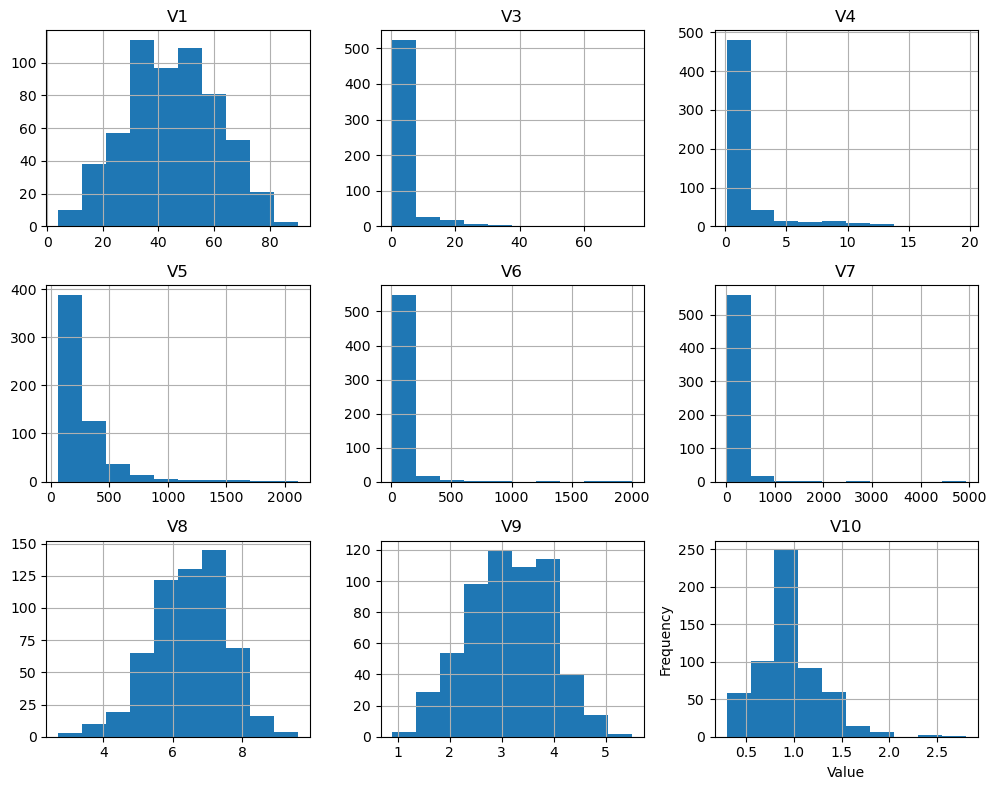

In [60]:
dataset_9971[numeric_cols].hist(figsize=(10, 8))
plt.xlabel("Value") 
plt.ylabel("Frequency") 
plt.tight_layout() 
plt.show()

In [61]:
dataset_9971['Class'].value_counts()

Class
1    416
2    167
Name: count, dtype: int64

In [62]:
task = openml.tasks.get_task(10101)
dataset_id = task.dataset_id
dataset_10101 = get_dataset(dataset_id)
dataset_10101.head(10)

,V1,V2,V3,V4,Class
0,2,50,12500.0,98,2
1,0,13,3250.0,28,2
2,1,16,4000.0,35,2
3,2,20,5000.0,45,2
4,1,24,6000.0,77,1
5,4,4,1000.0,4,1
6,2,7,1750.0,14,2
7,1,12,3000.0,35,1
8,2,9,2250.0,22,2
9,5,46,11500.0,98,2


In [63]:
# dataset_10101.to_csv('dataset_10101.csv', index=False)

In [64]:
dataset_10101['Class'].value_counts()

Class
1    570
2    178
Name: count, dtype: int64

In [65]:
dataset_10101.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V1      748 non-null    uint8   
 1   V2      748 non-null    uint8   
 2   V3      748 non-null    float64 
 3   V4      748 non-null    uint8   
 4   Class   748 non-null    category
dtypes: category(1), float64(1), uint8(3)
memory usage: 9.0 KB


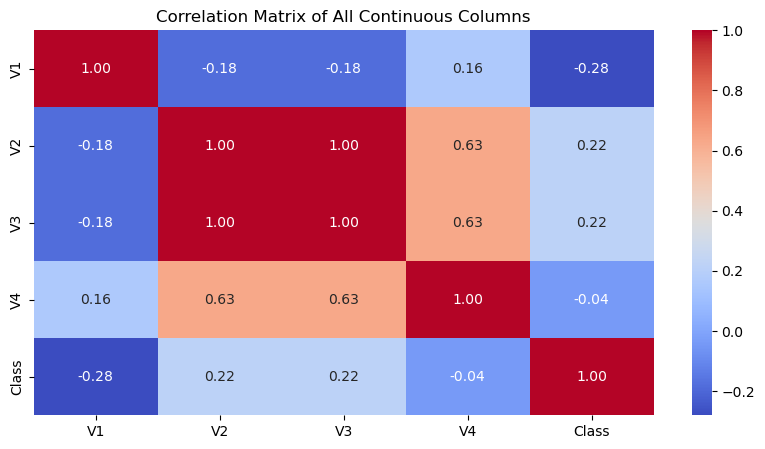

In [66]:
numeric_cols = [column for column in dataset_10101.columns if is_numerical(dataset_10101[column])] +['Class']
correlation_matrix = dataset_10101[numeric_cols].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Continuous Columns')
plt.show()

The Pearson correlation can be used in this case because the categorical value on 'Class' is dichotomous. In these cases, pearsons can be used and have the same result as methods like point-biserial correlations.

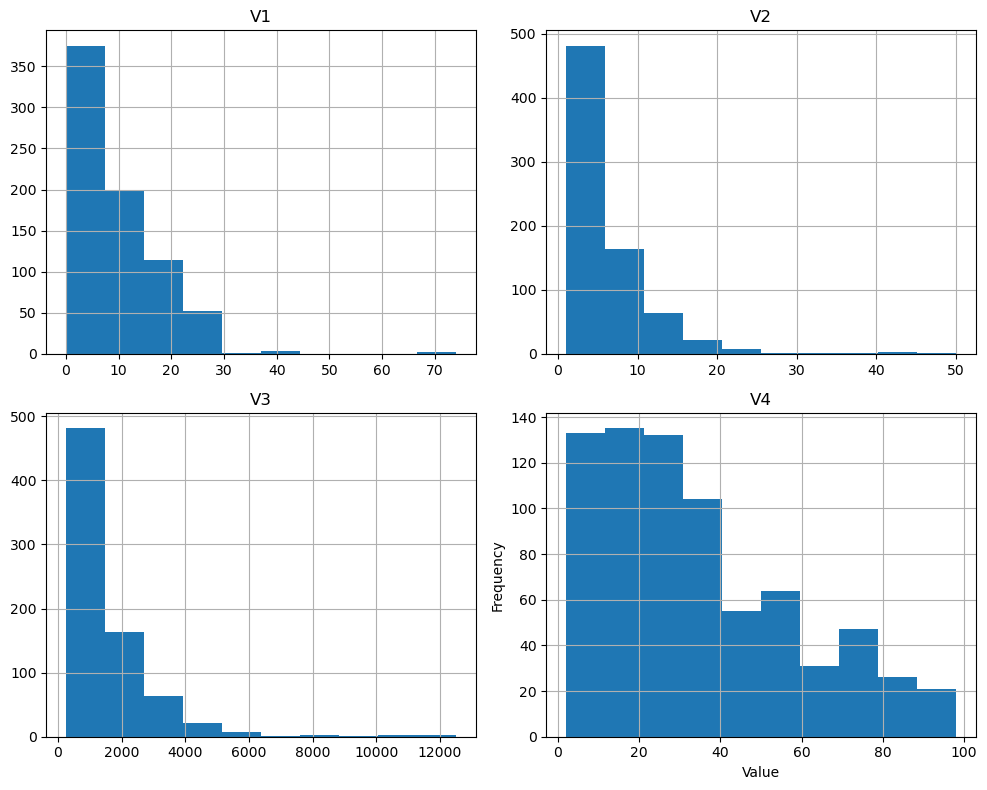

In [67]:
dataset_10101[numeric_cols].hist(figsize=(10, 8))
plt.xlabel("Value") 
plt.ylabel("Frequency") 
plt.tight_layout() 
plt.show()

In [87]:
task = openml.tasks.get_task(3904)
dataset_id = task.dataset_id
dataset_3904 = get_dataset(dataset_id)
dataset_3904.head(10)
# dataset_3904.to_csv('dataset_3904.csv', index=False)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51.0,10.0,8.0,1,17.0,36.0,112.0,86.0,13.0,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129.0,29.0,28.0,2,17.0,135.0,329.0,271.0,5.0,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28.0,1.0,6.0,0,11.0,16.0,76.0,50.0,7.0,True
5,31.0,2.0,1.0,2.0,111.0,582.52,0.08,12.25,47.55,7135.87,...,19.0,0.0,5.0,0,14.0,24.0,69.0,42.0,3.0,True
6,78.0,9.0,5.0,4.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,17.0,True
7,8.0,1.0,1.0,1.0,16.0,50.72,0.36,2.80,18.11,142.01,...,5.0,0.0,1.0,0,4.0,5.0,9.0,7.0,1.0,True
8,24.0,2.0,1.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.0,True
9,143.0,22.0,20.0,10.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,43.0,True


In [88]:
dataset_3904.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  float64
 13  lOComment          10885 non-null  float64
 14  lOBlank            10885 non-null  float64
 15  locCodeAndComment  10885 non-null  uint8  
 16  uniq_Op            108

In [89]:
dataset_3904['defects'].value_counts()

defects
False    8779
True     2106
Name: count, dtype: int64

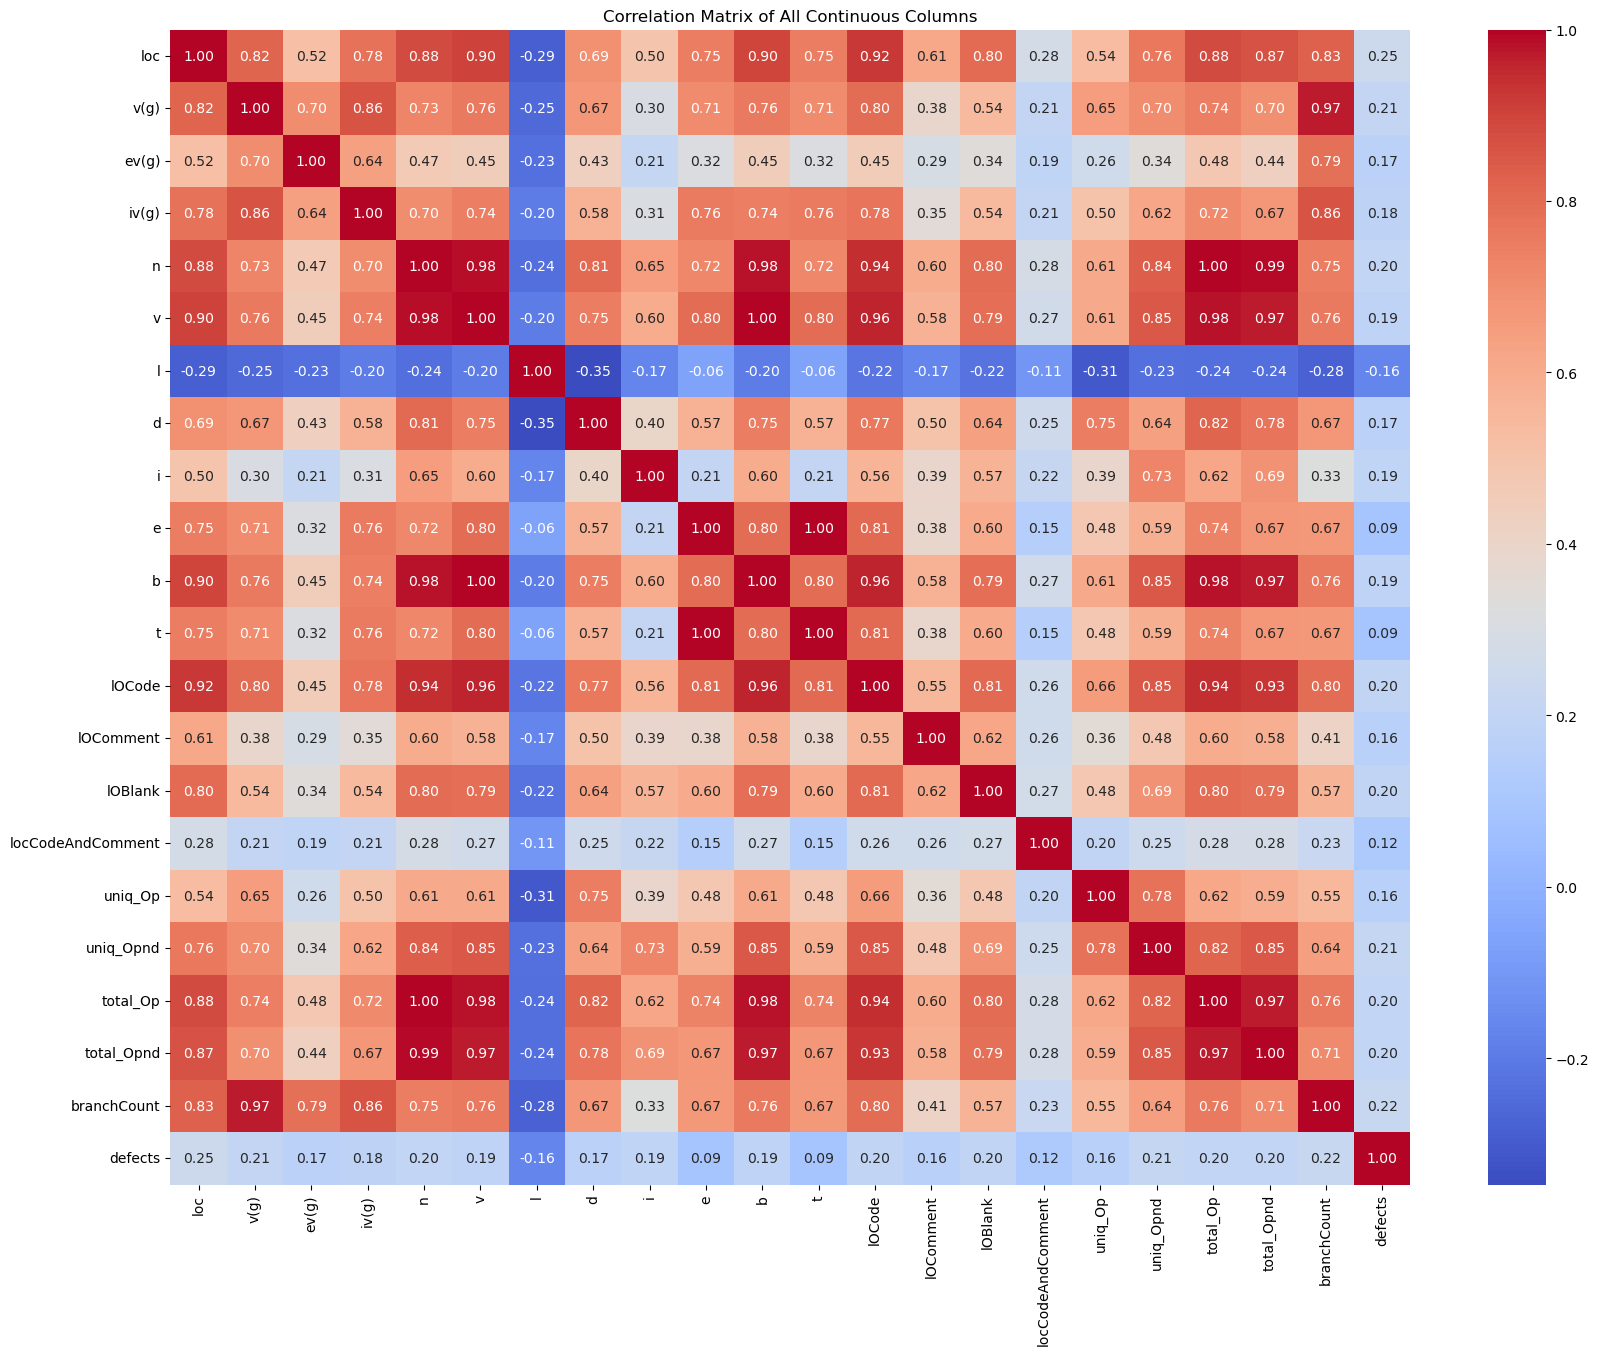

In [90]:
numeric_cols = [column for column in dataset_3904.columns if is_numerical(dataset_3904[column])] +['defects']
correlation_matrix = dataset_3904[numeric_cols].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Continuous Columns')
plt.show()

The Pearson correlation can be used in this case because the categorical value on 'Class' is dichotomous. In these cases, pearsons can be used and have the same result as methods like point-biserial correlations.

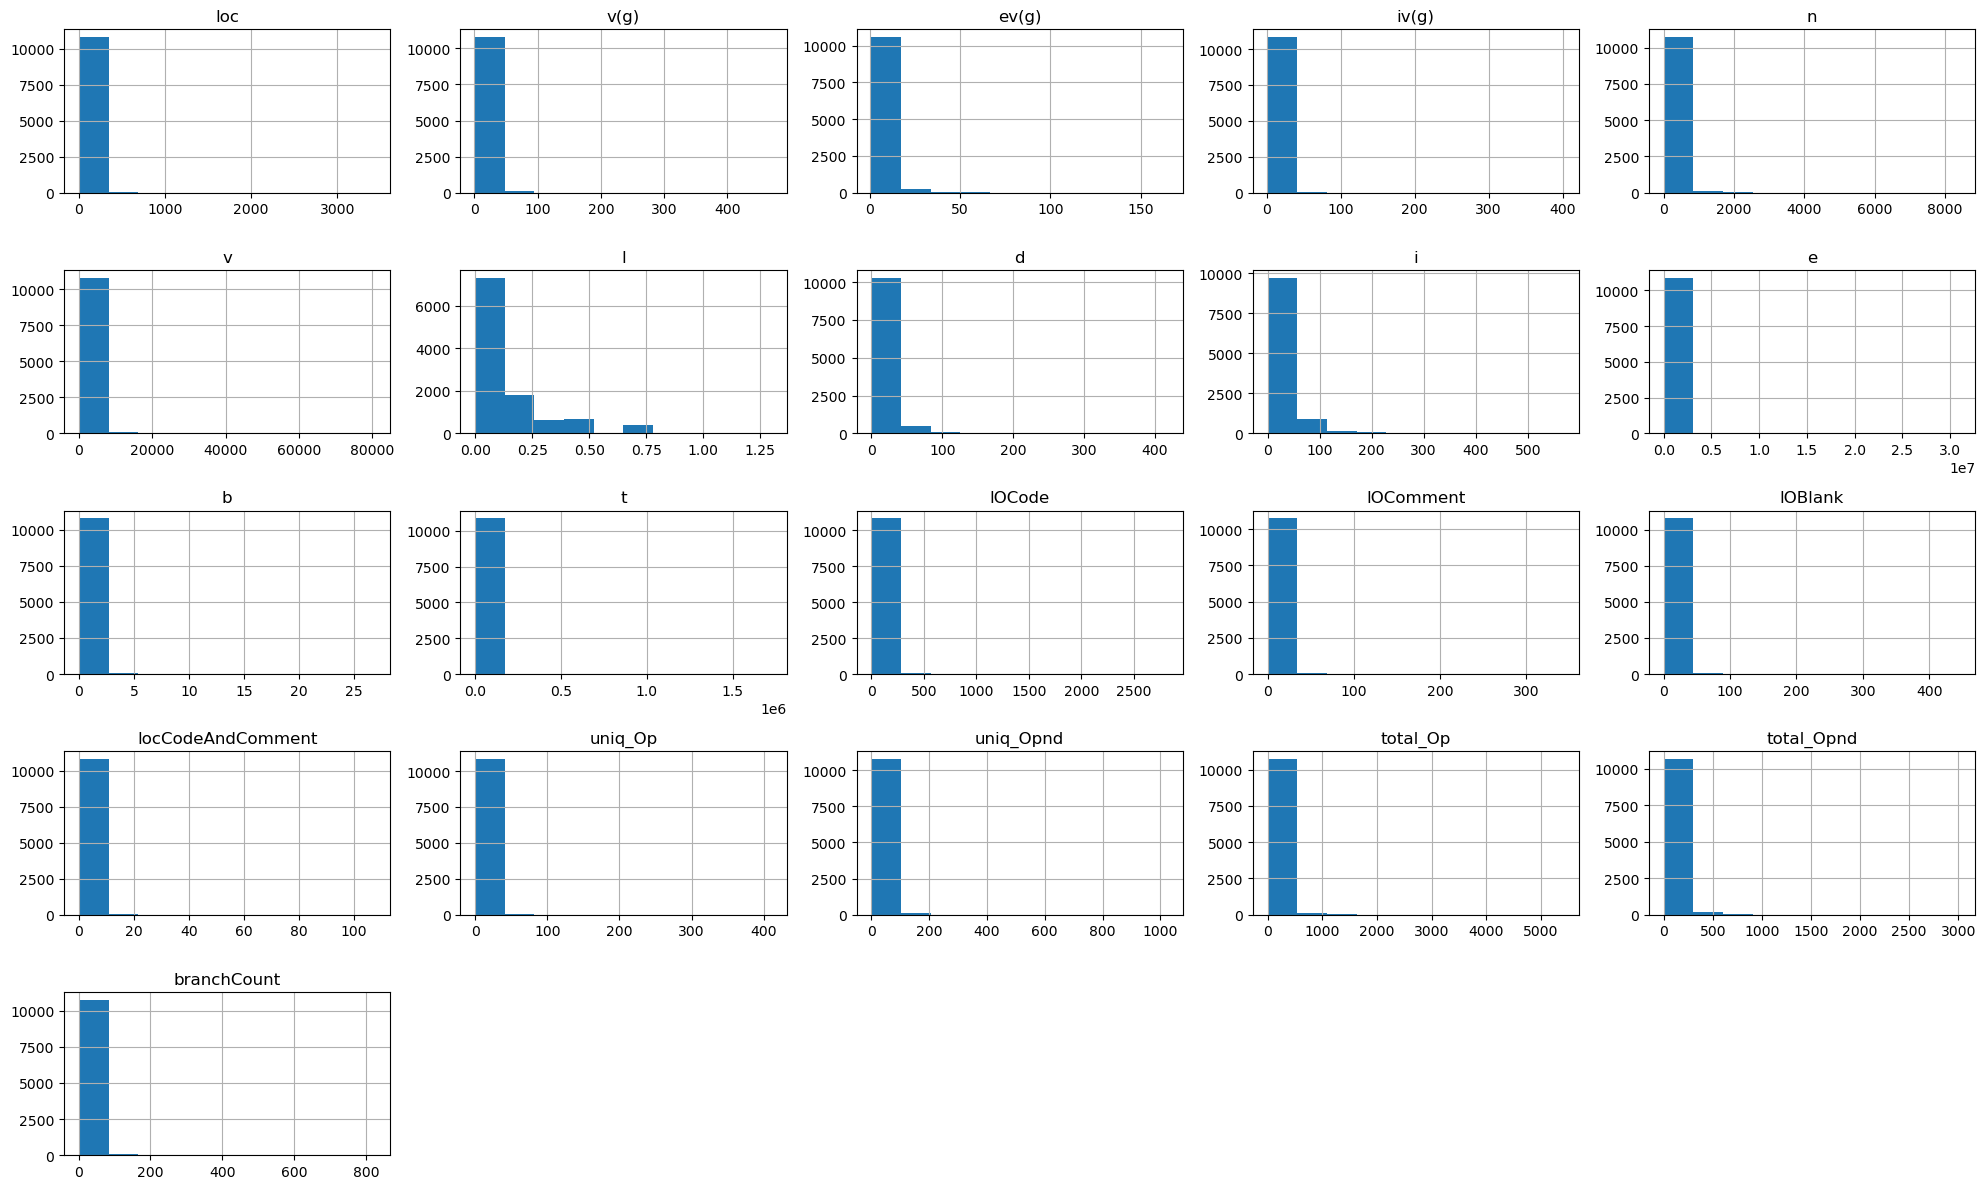

In [92]:
dataset_3904[numeric_cols].hist(figsize=(20, 12))
plt.xlabel("Value") 
plt.ylabel("Frequency") 
plt.tight_layout() 
plt.show()

## Conclusões:
Os datasets analisados, que são considerados desbalanceados (com valor minoritário da classe **normalizado** <= 0.3), aparentemente fizeram o KNN sofrer para conseguir tirar boas métricas de roc_auc devido ao número de colunas noisy. Notou-se que não é comum colunas com um grau de correlação alto entre a classe target, mas que possuem as vezes fortes interações entre si, o que transforma um conjunto de colunas algo que influencia. Portanto, no dataset 3904 por exemplo, a maioria das colunas são correlacionadas entre si.  
As distribuições de valores parecem ser enviesadas em alguns casos.  
  
Talvez mudanças na forma como computados colunas noisy podem resultar.

## Analysis of balanced datasets
Getting the 20 worst roc_auc between the disbalanced binary datasets. 14 of the them belongs to the dataset 9976 and 6 for dataset 49. Its a good start to see what is happening in these datasets.

In [93]:
knn_metrics_binary_balanced = knn_metrics.query("tasks_description == 'balanced_binary_tasks'")
lowest_accuracies = knn_metrics_binary_balanced.nsmallest(30, 'roc_auc')
lowest_accuracies.sort_values(by='roc_auc')

,dataset,model,neighbours,weights,tasks_description,accuracy,precision,recall,f1,roc_auc,roc_auc_ovr
61,9976,knn,3,distance,balanced_binary_tasks,0.548462,0.541687,0.628462,0.581447,0.560189,0.560189
11,9976,knn,3,uniform,balanced_binary_tasks,0.548462,0.541687,0.628462,0.581447,0.560459,0.560459
111,9976,knn,5,uniform,balanced_binary_tasks,0.537308,0.531329,0.636154,0.578347,0.566464,0.566464
161,9976,knn,5,distance,balanced_binary_tasks,0.537308,0.531329,0.636154,0.578347,0.567367,0.567367
211,9976,knn,7,uniform,balanced_binary_tasks,0.558077,0.548434,0.660000,0.598325,0.577003,0.577003
261,9976,knn,7,distance,balanced_binary_tasks,0.558077,0.548434,0.660000,0.598325,0.578994,0.578994
311,9976,knn,9,uniform,balanced_binary_tasks,0.568462,0.557481,0.671538,0.608441,0.590133,0.590133
361,9976,knn,9,distance,balanced_binary_tasks,0.568462,0.557481,0.671538,0.608441,0.590956,0.590956
411,9976,knn,11,uniform,balanced_binary_tasks,0.564615,0.553483,0.671538,0.606226,0.595962,0.595962
461,9976,knn,11,distance,balanced_binary_tasks,0.564615,0.553483,0.671538,0.606226,0.597086,0.597086


In [94]:
task = openml.tasks.get_task(9976)
dataset_id = task.dataset_id
dataset_9976 = get_dataset(dataset_id)
dataset_9976.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V492,V493,V494,V495,V496,V497,V498,V499,V500,Class
0,485.0,477.0,537.0,479.0,452.0,471.0,491.0,476.0,475.0,473.0,...,481.0,477.0,485.0,511.0,485.0,481.0,479.0,475.0,496.0,2
1,483.0,458.0,460.0,487.0,587.0,475.0,526.0,479.0,485.0,469.0,...,478.0,487.0,338.0,513.0,486.0,483.0,492.0,510.0,517.0,2
2,487.0,542.0,499.0,468.0,448.0,471.0,442.0,478.0,480.0,477.0,...,481.0,492.0,650.0,506.0,501.0,480.0,489.0,499.0,498.0,2
3,480.0,491.0,510.0,485.0,495.0,472.0,417.0,474.0,502.0,476.0,...,480.0,474.0,572.0,454.0,469.0,475.0,482.0,494.0,461.0,1
4,484.0,502.0,528.0,489.0,466.0,481.0,402.0,478.0,487.0,468.0,...,479.0,452.0,435.0,486.0,508.0,481.0,504.0,495.0,511.0,1
5,481.0,496.0,451.0,480.0,516.0,484.0,484.0,476.0,500.0,482.0,...,481.0,477.0,435.0,491.0,564.0,482.0,463.0,457.0,500.0,1
6,484.0,533.0,498.0,466.0,577.0,482.0,471.0,477.0,476.0,468.0,...,483.0,490.0,648.0,484.0,475.0,479.0,475.0,462.0,484.0,1
7,474.0,468.0,598.0,490.0,530.0,482.0,448.0,476.0,497.0,489.0,...,479.0,511.0,351.0,462.0,533.0,480.0,501.0,529.0,489.0,2
8,484.0,498.0,558.0,489.0,508.0,478.0,471.0,478.0,488.0,470.0,...,478.0,478.0,633.0,453.0,556.0,458.0,473.0,531.0,440.0,1
9,496.0,448.0,570.0,476.0,477.0,481.0,595.0,477.0,465.0,490.0,...,476.0,447.0,576.0,511.0,508.0,478.0,486.0,582.0,496.0,2


In [95]:
print(dataset_9976.shape)
print(dataset_9976['Class'].value_counts())
print(dataset_9976.columns)

(2600, 501)
Class
1    1300
2    1300
Name: count, dtype: int64
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V492', 'V493', 'V494', 'V495', 'V496', 'V497', 'V498', 'V499', 'V500',
       'Class'],
      dtype='object', length=501)


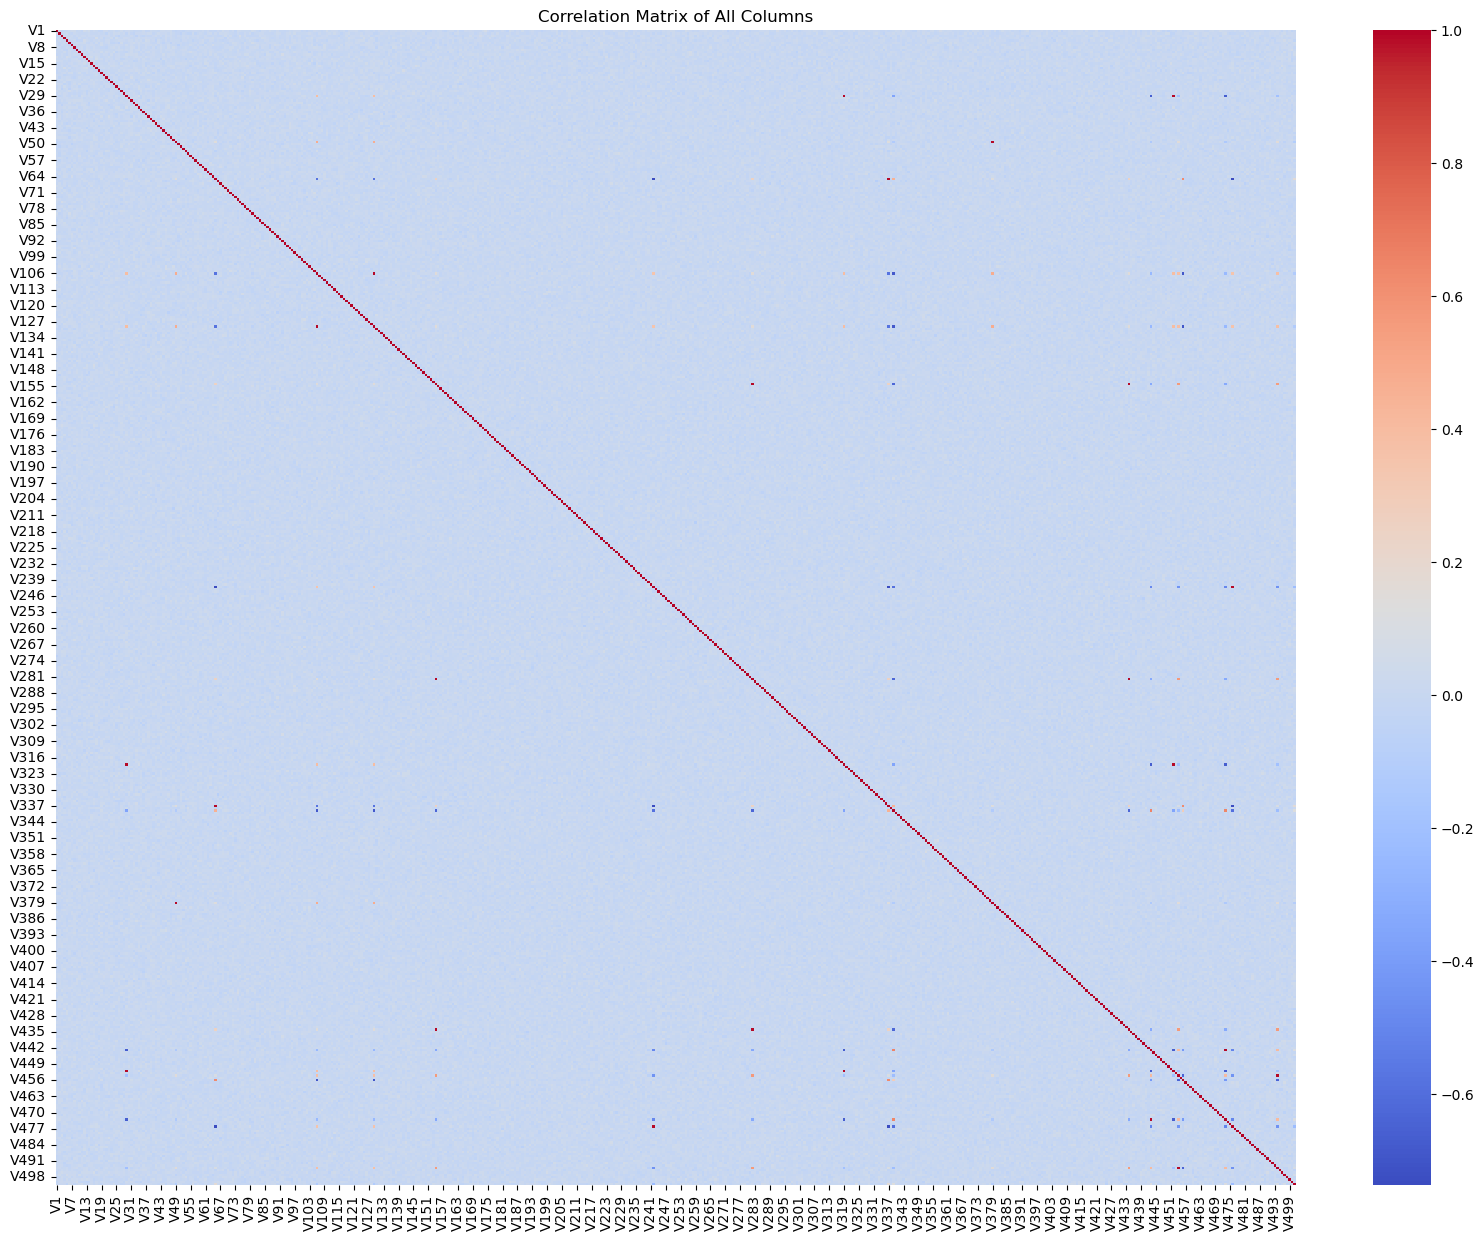

In [110]:
numeric_cols = [column for column in dataset_9976.columns if is_numerical(dataset_9976[column])] + ['Class']
correlation_matrix = dataset_9976[numeric_cols].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Columns')
plt.show()

In [111]:
dataset_9976_filtered = dataset_9976[['V1','V100','V200','V300','V400', 'V450', 'Class']]

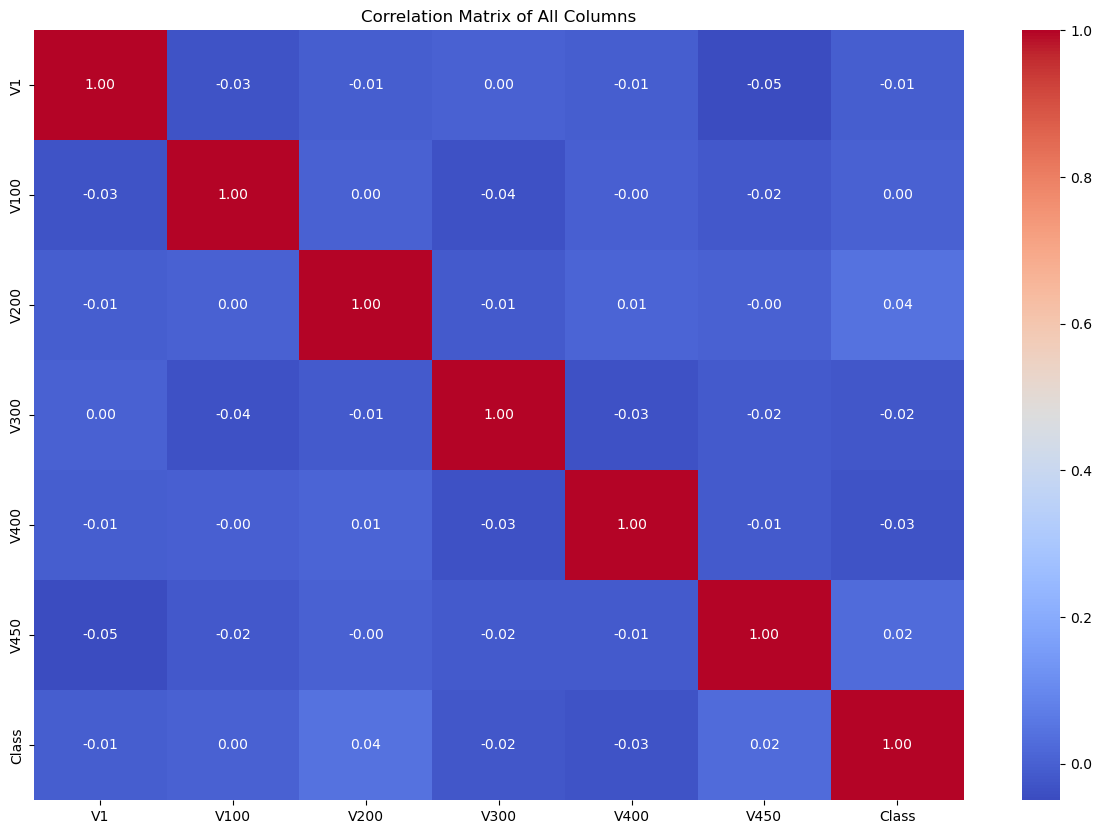

In [112]:
numeric_cols = [column for column in dataset_9976_filtered.columns if is_numerical(dataset_9976_filtered[column])]
numeric_cols_with_class=numeric_cols + ['Class']
correlation_matrix = dataset_9976_filtered[numeric_cols_with_class].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Columns')
plt.show()

The Pearson correlation can be used in this case because the categorical value on 'Class' is dichotomous. In these cases, pearsons can be used and have the same result as methods like point-biserial correlations.

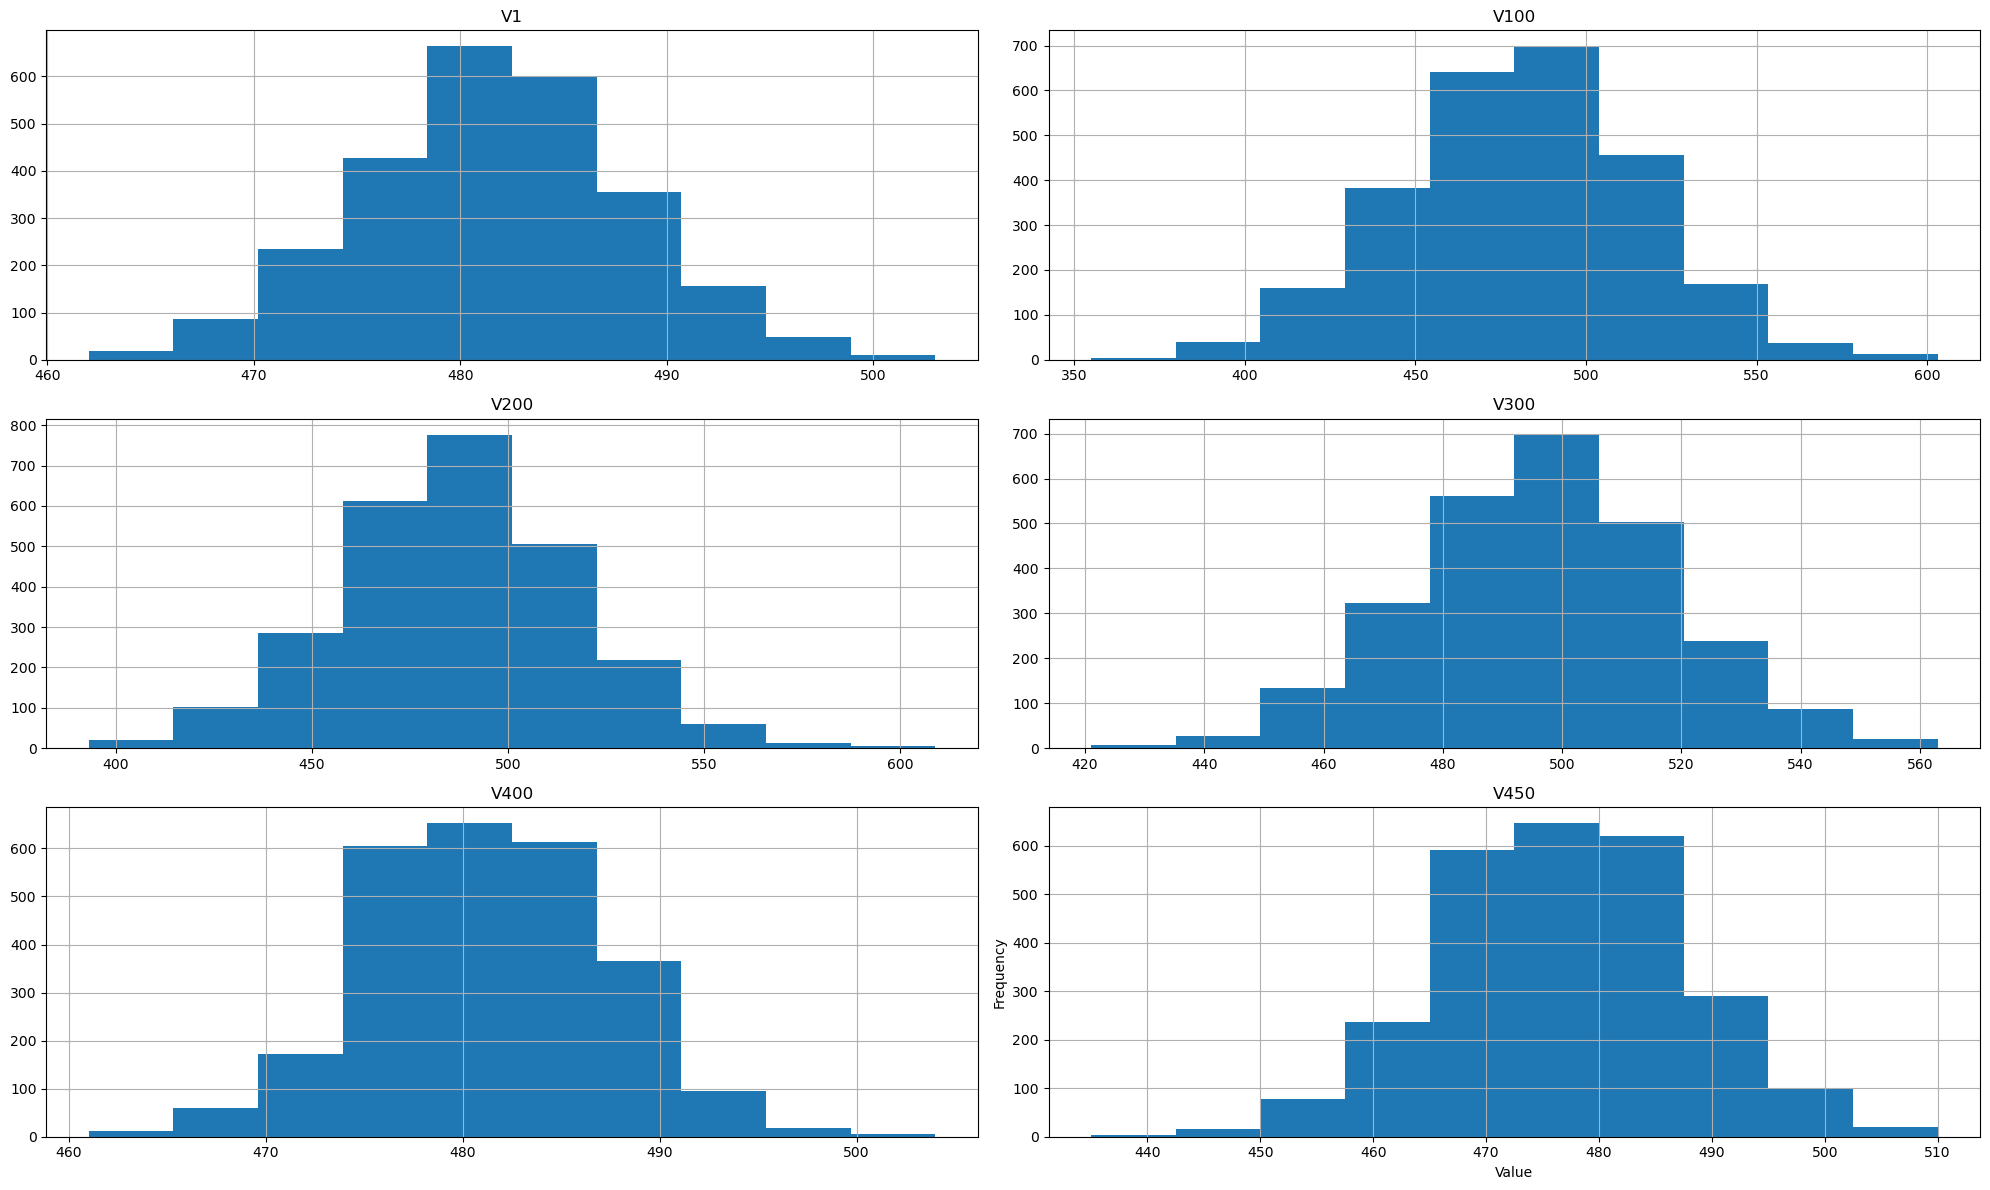

In [113]:
dataset_9976_filtered = dataset_9976[['V1','V100','V200','V300','V400', 'V450']]
dataset_9976_filtered[numeric_cols].hist(figsize=(20, 12))
plt.xlabel("Value") 
plt.ylabel("Frequency") 
plt.tight_layout() 
plt.show()


In [114]:
task = openml.tasks.get_task(31)
dataset_id = task.dataset_id
dataset_31 = get_dataset(dataset_id)
dataset_31.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
5,no checking,36,existing paid,education,9055.0,no known savings,1<=X<4,2,male single,none,...,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
6,no checking,24,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3,male single,none,...,life insurance,53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,existing paid,used car,6948.0,<100,1<=X<4,2,male single,none,...,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,good
8,no checking,12,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2,male div/sep,none,...,real estate,61,none,own,1,unskilled resident,1,none,yes,good
9,0<=X<200,30,critical/other existing credit,new car,5234.0,<100,unemployed,4,male mar/wid,none,...,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,bad


In [130]:
print(dataset_31.shape)
print(dataset_31['class'].value_counts())
print(dataset_31.columns)

(1000, 21)
class
good    700
bad     300
Name: count, dtype: int64
Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


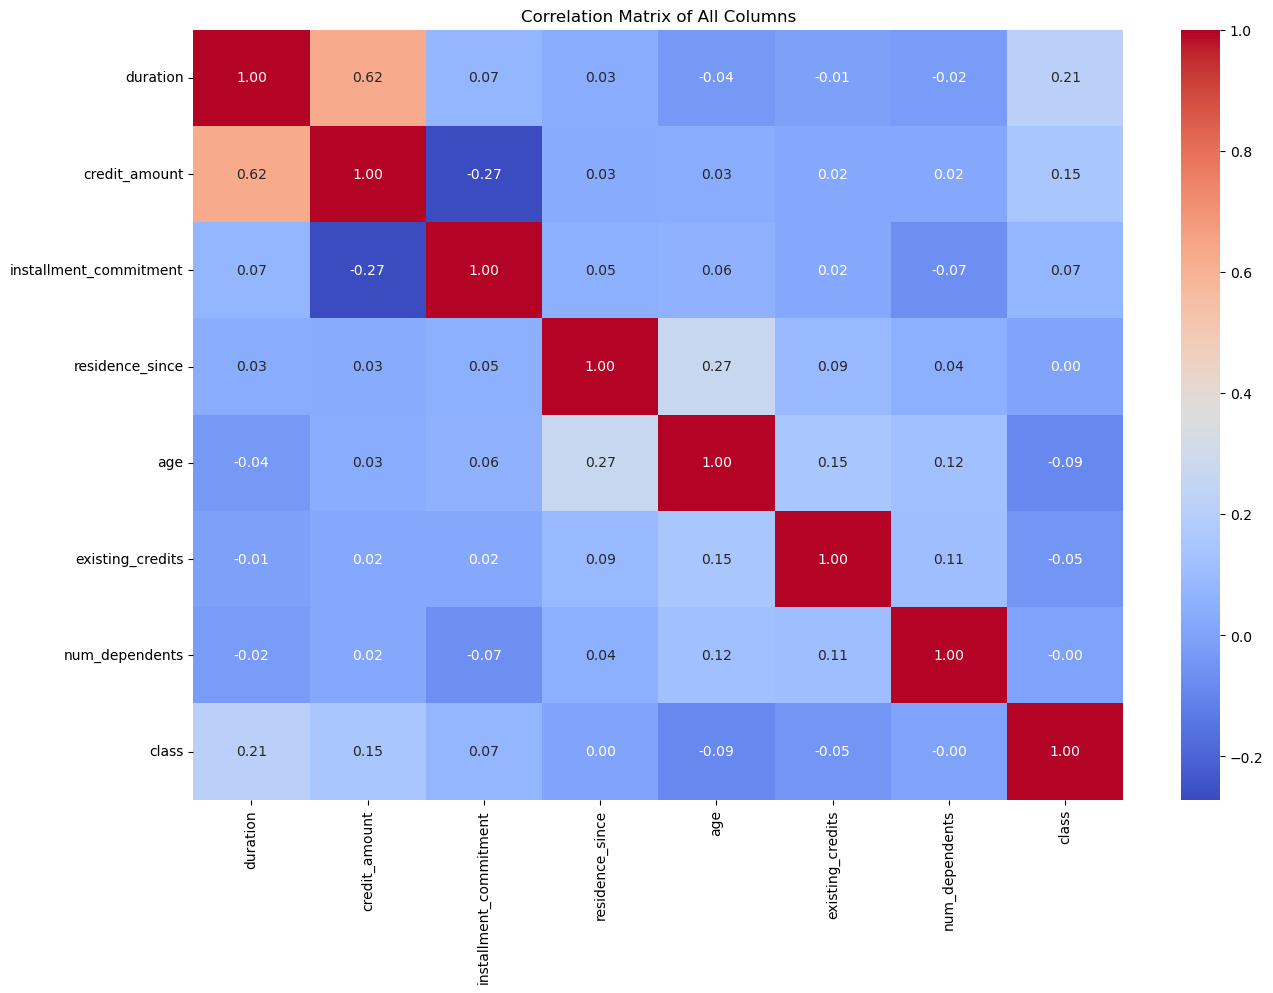

In [133]:
numeric_cols = [column for column in dataset_31.columns if is_numerical(dataset_31[column])]
numeric_cols_with_class = numeric_cols + ['class']
dataset_31['class'] = dataset_31['class'].replace({'good': 1, 'bad': 2})
correlation_matrix = dataset_31[numeric_cols_with_class].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Columns')
plt.show()

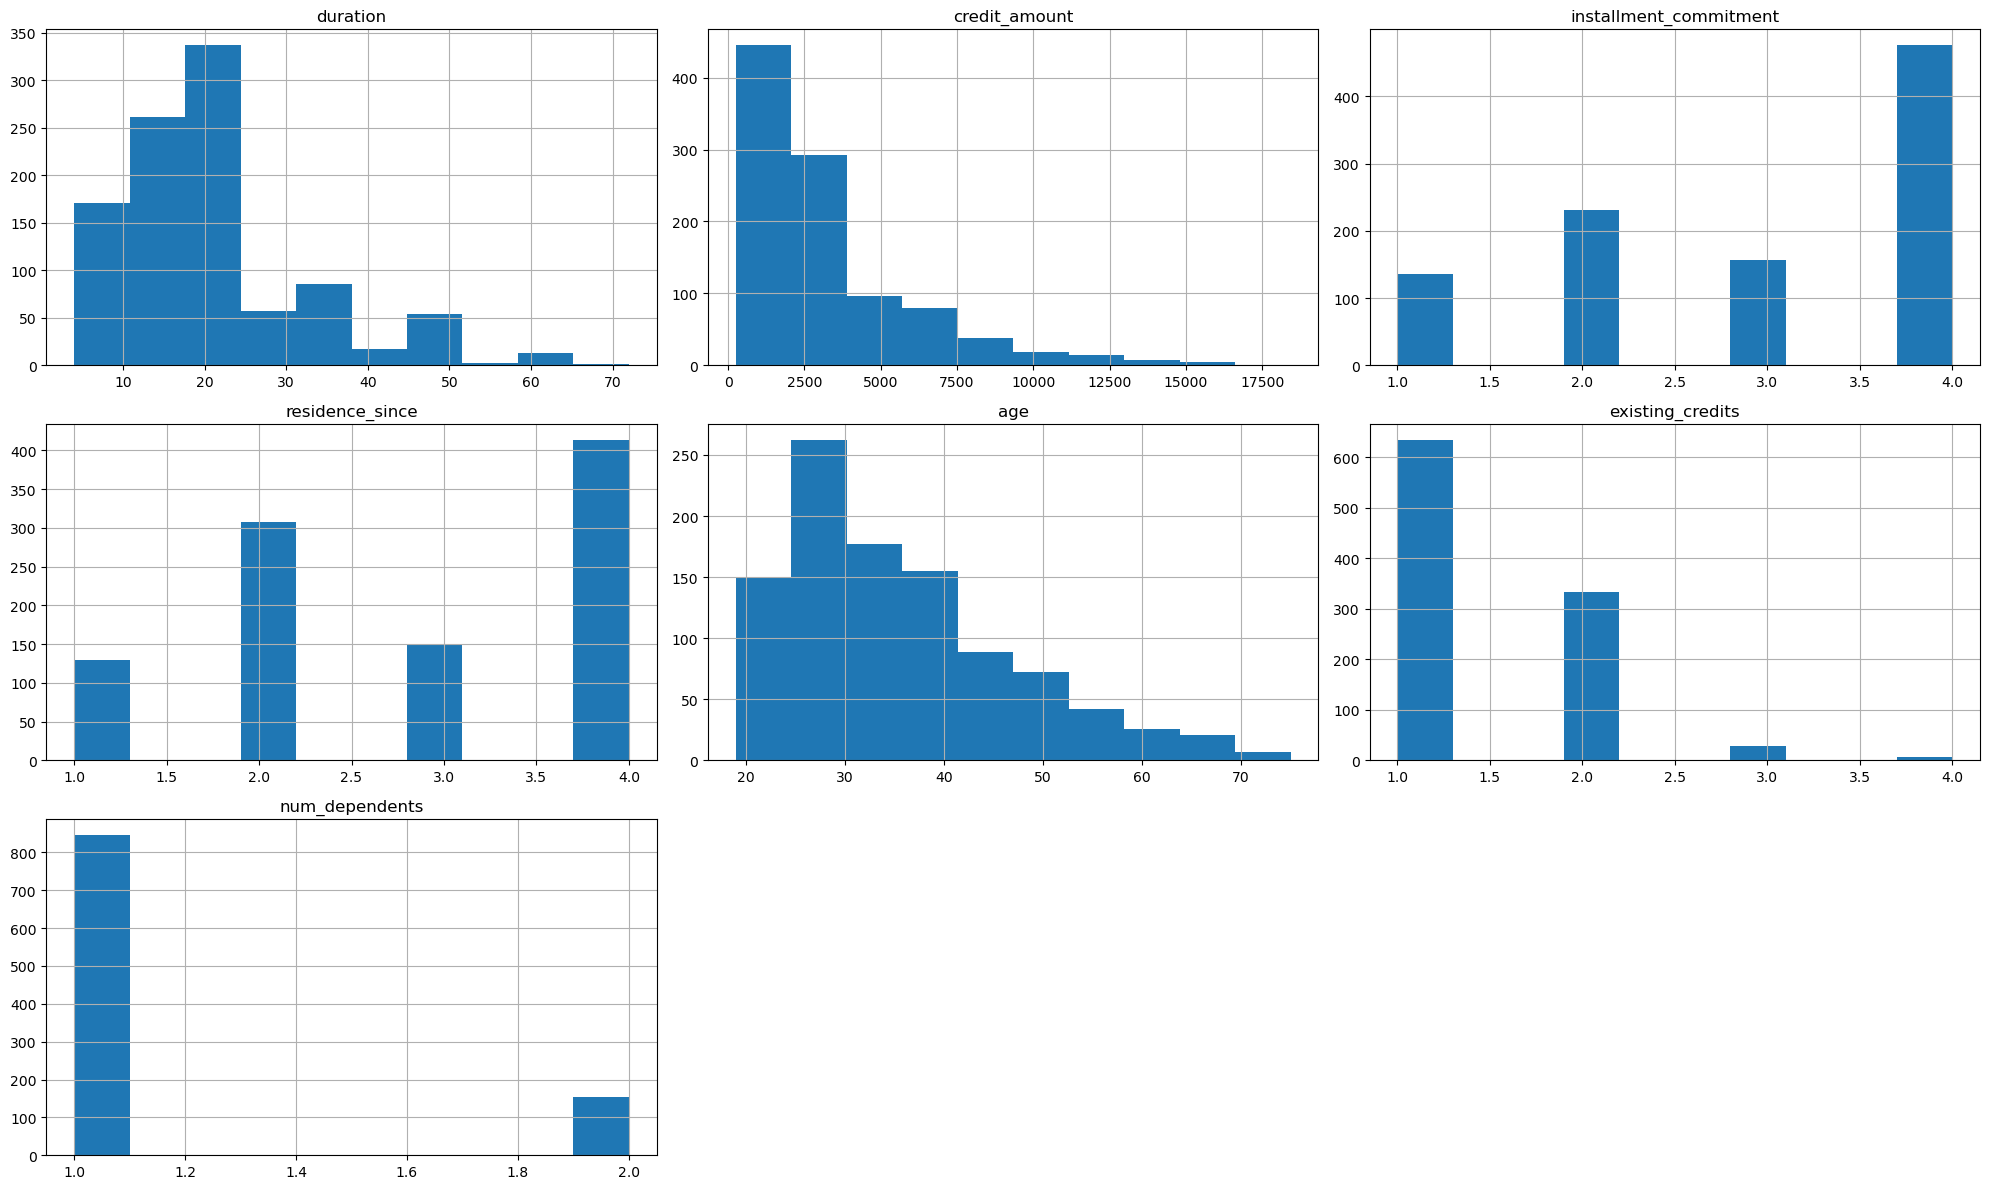

In [118]:
dataset_31[numeric_cols].hist(figsize=(20, 12))
plt.xlabel("Value") 
plt.ylabel("Frequency") 
plt.tight_layout() 
plt.show()

## Conclusões: 
Nos exemplos acima, existem muitas colunas que tem pouca correlação com a classe target e com outras classes. Possivelmente são colunas noisy, que atrapalham o poder de decisão do KNN. Podemos fazer algo relacionado ao tratamento de colunas noisy.

Obs: Optamos por retirar a analise dos datasets multiclasse por falta de tempo e por não ser fácil analisar. 